In [5]:
%matplotlib inline

In [10]:
import fenics

import phaseflow

# Demonstrate the heat-driven cavity benchmark.

Define function to verify against published data.

In [7]:
def verify_against_wang2010(solution):

    data = {'Ra': 1.e6, 'Pr': 0.71, 'x': 0.5,
        'y': [0., 0.15, 0.35, 0.5, 0.65, 0.85, 1.],
        'ux': [0.0000, -0.0649, -0.0194, 0.0000, 0.0194, 0.0649, 0.0000]}
    
    for i, true_ux in enumerate(data['ux']):
    
        p = fenics.Point(data['x'], data['y'][i])

        values = solution(p)
        
        ux = values[0]*data['Pr']/data['Ra']**0.5
        
        assert(abs(ux - true_ux) < 2.e-2)
        
    print("Successfully verified against wang2010.")

Define function to run the benchmark with Phaseflow.

In [8]:
def heat_driven_cavity(output_dir = "output/heat_driven_cavity",
        grid_size = 40,
        time_step_size = 0.001,
        end_time = 1.,
        stop_when_steady = True,
        steady_relative_tolerance = 1.e-4):

    def m_B(T, Ra, Pr, Re):

        return T*Ra/(Pr*Re**2)


    def ddT_m_B(T, Ra, Pr, Re):

        return Ra/(Pr*Re**2)
    
    
    solution, mesh = phaseflow.run(output_dir = output_dir,
        rayleigh_number = 1.e6,
        prandtl_number = 0.71,
        thermal_conductivity = 1.,
        liquid_viscosity = 1.,
        gravity = (0., -1.),
        m_B = m_B,
        ddT_m_B = ddT_m_B,
        mesh = fenics.UnitSquareMesh(fenics.dolfin.mpi_comm_world(), grid_size, grid_size),
        initial_values_expression = ("0.", "0.", "0.", "0.5 - x[0]"),
        boundary_conditions = [{"subspace": 0,
                "value_expression": ("0.", "0."), "degree": 3,
                "location_expression": "near(x[0],  0.) | near(x[0],  1.) | near(x[1], 0.) | near(x[1],  1.)", "method": "topological"},
            {"subspace": 2,
                "value_expression": "0.5", "degree": 2, 
                "location_expression": "near(x[0],  0.)", "method": "topological"},
             {"subspace": 2,
                "value_expression": "-0.5", "degree": 2, 
                "location_expression": "near(x[0],  1.)", "method": "topological"}],
        end_time = end_time,
        time_step_size = time_step_size,
        stop_when_steady = stop_when_steady,
        steady_relative_tolerance=steady_relative_tolerance)
        
    return solution

Test the benchmark.

In [9]:
solution = heat_driven_cavity()

Running Phaseflow with the following arguments:
({'stop_when_steady': True, 'gravity': (0.0, -1.0), 'nlp_absolute_tolerance': 1e-08, 'solid_viscosity': 1e-08, 'adaptive': False, 'adaptive_metric': 'all', 'start_time': 0.0, 'adaptive_solver_tolerance': 0.0001, 'temperature_of_fusion': -1000000000000.0, 'nlp_relative_tolerance': 1e-08, 'rayleigh_number': 1000000.0, 'initial_values_expression': ('0.', '0.', '0.', '0.5 - x[0]'), 'boundary_conditions': [{'method': 'topological', 'degree': 3, 'location_expression': 'near(x[0],  0.) | near(x[0],  1.) | near(x[1], 0.) | near(x[1],  1.)', 'value_expression': ('0.', '0.'), 'subspace': 0}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  0.)', 'value_expression': '0.5', 'subspace': 2}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  1.)', 'value_expression': '-0.5', 'subspace': 2}], 'ddT_m_B': <function heat_driven_cavity.<locals>.ddT_m_B at 0x7fed467ad950>, 'restart_filepath': '', 'time_step_s

Reached time t = 0.044
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0004946167876771769
Reached time t = 0.045
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00044573197719098004
Reached time t = 0.046
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00040193887961948084
Reached time t = 0.047
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0003626311903312531
Reached time t = 0.048
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0003272539026313065
Reached time t = 0.049
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00029534061716095055
Reached time t = 0.05
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of re

In [11]:
verify_against_wang2010(solution)

Successfully verified against wang2010.


# Set the baseline.

To verify time accuracy, we must simulate until a prescribed time, rather than reaching a steady state. Here we choose the time mostly arbitrarily. The only requirement is that the solution is still significantly unsteady.

In [12]:
end_time = 0.02

First we obtain a baseline solution.

In [13]:
baseline_time_step_size = 1.e-3

baseline_grid_size = 40

baseline_solution = heat_driven_cavity(output_dir = "output/heat_driven_cavity_baseline",
        grid_size = baseline_grid_size,
        time_step_size = baseline_time_step_size,
        end_time = end_time)

Running Phaseflow with the following arguments:
({'stop_when_steady': True, 'gravity': (0.0, -1.0), 'nlp_absolute_tolerance': 1e-08, 'solid_viscosity': 1e-08, 'adaptive': False, 'adaptive_metric': 'all', 'start_time': 0.0, 'adaptive_solver_tolerance': 0.0001, 'temperature_of_fusion': -1000000000000.0, 'nlp_relative_tolerance': 1e-08, 'rayleigh_number': 1000000.0, 'initial_values_expression': ('0.', '0.', '0.', '0.5 - x[0]'), 'boundary_conditions': [{'method': 'topological', 'degree': 3, 'location_expression': 'near(x[0],  0.) | near(x[0],  1.) | near(x[1], 0.) | near(x[1],  1.)', 'value_expression': ('0.', '0.'), 'subspace': 0}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  0.)', 'value_expression': '0.5', 'subspace': 2}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  1.)', 'value_expression': '-0.5', 'subspace': 2}], 'ddT_m_B': <function heat_driven_cavity.<locals>.ddT_m_B at 0x7fed467ad950>, 'restart_filepath': '', 'time_step_s

and plot the temperature field, which is the only part of the solution we wish to check for this study. Analyzing convergence of the entire mixed finite element solution will introduce unnecessary complications, since ultimately we are interested primarily in the temperature field.

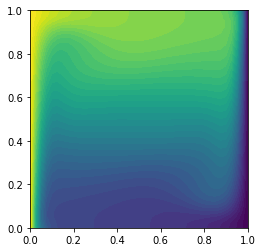

In [14]:
def plot_temperature(solution):
    
    velocity, pressure, temperature = fenics.split(solution)

    fenics.plot(temperature)
    
    
plot_temperature(baseline_solution)

# Converge in time.

Use a Python dict to organize the results.

In [15]:
solutions = {"nt20_nx40": baseline_solution}

Define a function to compute new solutions and add the results to the dictionary.

In [16]:
def compute_and_append_new_solution(nt, nx, solutions):

    solution = heat_driven_cavity(
        output_dir = "output/heat_driven_cavity/nt" + str(nt) + "/nx" + str(nx) + "/",
        grid_size = nx,
        time_step_size = end_time/nt,
        end_time = end_time)

    solutions["nt" + str(nt) + "_nx" + str(nx)] = solution
    
    return solutions

Set a constant rate of refinement so that convergence rates can be computed.

In [17]:
r = 2

Adjust the time step until first order temporal convergence is verified. First we attempt increasing the size. We do not yet know if this is in the asymptotic range of convergence.

In [18]:
baseline_time_step_count = int(round(end_time/baseline_time_step_size))

print(baseline_time_step_count)

20


In [19]:
nt = int(baseline_time_step_count/r)

nx = baseline_grid_size

solutions = compute_and_append_new_solution(nt, nx, solutions)

Running Phaseflow with the following arguments:
({'stop_when_steady': True, 'gravity': (0.0, -1.0), 'nlp_absolute_tolerance': 1e-08, 'solid_viscosity': 1e-08, 'adaptive': False, 'adaptive_metric': 'all', 'start_time': 0.0, 'adaptive_solver_tolerance': 0.0001, 'temperature_of_fusion': -1000000000000.0, 'nlp_relative_tolerance': 1e-08, 'rayleigh_number': 1000000.0, 'initial_values_expression': ('0.', '0.', '0.', '0.5 - x[0]'), 'boundary_conditions': [{'method': 'topological', 'degree': 3, 'location_expression': 'near(x[0],  0.) | near(x[0],  1.) | near(x[1], 0.) | near(x[1],  1.)', 'value_expression': ('0.', '0.'), 'subspace': 0}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  0.)', 'value_expression': '0.5', 'subspace': 2}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  1.)', 'value_expression': '-0.5', 'subspace': 2}], 'ddT_m_B': <function heat_driven_cavity.<locals>.ddT_m_B at 0x7fed45dc4048>, 'restart_filepath': '', 'time_step_s

Again lets visualize the temperature field.

In [20]:
print(solutions.keys())

dict_keys(['nt10_nx40', 'nt20_nx40'])


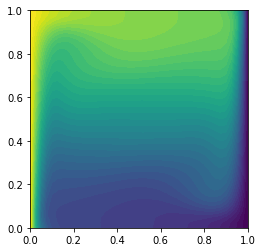

In [21]:
plot_temperature(solutions["nt10_nx40"])

To compute a convergence rate, we need three solutions. The solution with smallest time step size will be used as the "truth". Then we can compute errors for the two coarser solutions, and compute the convergence rate from these errors. We already have two solutions, so we only need one more.

In [22]:
solutions = compute_and_append_new_solution(int(nt/r), nx, solutions)

Running Phaseflow with the following arguments:
({'stop_when_steady': True, 'gravity': (0.0, -1.0), 'nlp_absolute_tolerance': 1e-08, 'solid_viscosity': 1e-08, 'adaptive': False, 'adaptive_metric': 'all', 'start_time': 0.0, 'adaptive_solver_tolerance': 0.0001, 'temperature_of_fusion': -1000000000000.0, 'nlp_relative_tolerance': 1e-08, 'rayleigh_number': 1000000.0, 'initial_values_expression': ('0.', '0.', '0.', '0.5 - x[0]'), 'boundary_conditions': [{'method': 'topological', 'degree': 3, 'location_expression': 'near(x[0],  0.) | near(x[0],  1.) | near(x[1], 0.) | near(x[1],  1.)', 'value_expression': ('0.', '0.'), 'subspace': 0}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  0.)', 'value_expression': '0.5', 'subspace': 2}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  1.)', 'value_expression': '-0.5', 'subspace': 2}], 'ddT_m_B': <function heat_driven_cavity.<locals>.ddT_m_B at 0x7fed45dc42f0>, 'restart_filepath': '', 'time_step_s

dict_keys(['nt10_nx40', 'nt20_nx40', 'nt5_nx40'])


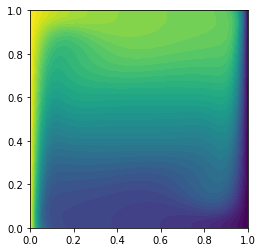

In [23]:
print(solutions.keys())

plot_temperature(solutions["nt5_nx40"])

With these solutions in hand, we compute the errors with respect to the finest solution

In [29]:
errors = [fenics.errornorm(solutions["nt20_nx40"].split()[2], solutions["nt" + str(nt) + "_nx40"].split()[2], "L2") 
          for nt in [10, 5]]

print(errors)

[0.002343841381019596, 0.007705674632519236]


We compute the order of convergence as

In [30]:
import math

def compute_order(fine, coarse, r):
    
    return math.log(fine/coarse)/math.log(1./r)

which gives us

In [31]:
order = compute_order(errors[0], errors[1], r)

print(order)

1.717046331377011


This is on the right rack, but we must do better. Let's run another pair of finer solutions.

In [32]:
for i in [1, 2]:
    
    solutions = compute_and_append_new_solution(r**i*baseline_time_step_count, nx, solutions)
    
print(solutions.keys())

Running Phaseflow with the following arguments:
({'stop_when_steady': True, 'gravity': (0.0, -1.0), 'nlp_absolute_tolerance': 1e-08, 'solid_viscosity': 1e-08, 'adaptive': False, 'adaptive_metric': 'all', 'start_time': 0.0, 'adaptive_solver_tolerance': 0.0001, 'temperature_of_fusion': -1000000000000.0, 'nlp_relative_tolerance': 1e-08, 'rayleigh_number': 1000000.0, 'initial_values_expression': ('0.', '0.', '0.', '0.5 - x[0]'), 'boundary_conditions': [{'method': 'topological', 'degree': 3, 'location_expression': 'near(x[0],  0.) | near(x[0],  1.) | near(x[1], 0.) | near(x[1],  1.)', 'value_expression': ('0.', '0.'), 'subspace': 0}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  0.)', 'value_expression': '0.5', 'subspace': 2}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  1.)', 'value_expression': '-0.5', 'subspace': 2}], 'ddT_m_B': <function heat_driven_cavity.<locals>.ddT_m_B at 0x7fed4c9efe18>, 'restart_filepath': '', 'time_step_s

Writing solution to HDF5+XDMF
Reached time t = 0.00025
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 205578.60575855355
Reached time t = 0.0005
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.1283536251704959
Reached time t = 0.00075
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.19511284858187408
Reached time t = 0.001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.24353590208634915
Reached time t = 0.00125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.25920457964084226
Reached time t = 0.0015
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.23792067051784635
Reached time t = 0.00175
Writing solution to HDF5+XDMF
Uns

Reached time t = 0.0135
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.020378505673745433
Reached time t = 0.01375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01668273554565114
Reached time t = 0.014
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.014433152337118844
Reached time t = 0.01425
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.014299159464128455
Reached time t = 0.0145
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0158768232557779
Reached time t = 0.014750000000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.018111906878742458
Reached time t = 0.015
Writing solution to HDF5+XDMF
Unsteadiness (L2 

In [34]:
errors = [fenics.errornorm(solutions["nt80_nx40"], solutions["nt" + str(nt) + "_nx40"], "L2") for nt in [40, 20, 10, 5]]

print(errors)

for i in range(len(errors) - 1):
    
    order = compute_order(errors[i], errors[i + 1], r)

    print(order)

[880.1155605779225, 1381.9430782120278, 1695.4300832588744, 2728.1178893969427]
0.6509333233468888
0.29495309841701206
0.686254697261939


Refine further

In [36]:
for i in [3, 4]:
    
    solutions = compute_and_append_new_solution(r**i*baseline_time_step_count, nx, solutions)
    
print(solutions.keys())

Running Phaseflow with the following arguments:
({'stop_when_steady': True, 'gravity': (0.0, -1.0), 'nlp_absolute_tolerance': 1e-08, 'solid_viscosity': 1e-08, 'adaptive': False, 'adaptive_metric': 'all', 'start_time': 0.0, 'adaptive_solver_tolerance': 0.0001, 'temperature_of_fusion': -1000000000000.0, 'nlp_relative_tolerance': 1e-08, 'rayleigh_number': 1000000.0, 'initial_values_expression': ('0.', '0.', '0.', '0.5 - x[0]'), 'boundary_conditions': [{'method': 'topological', 'degree': 3, 'location_expression': 'near(x[0],  0.) | near(x[0],  1.) | near(x[1], 0.) | near(x[1],  1.)', 'value_expression': ('0.', '0.'), 'subspace': 0}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  0.)', 'value_expression': '0.5', 'subspace': 2}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  1.)', 'value_expression': '-0.5', 'subspace': 2}], 'ddT_m_B': <function heat_driven_cavity.<locals>.ddT_m_B at 0x7fed4c911f28>, 'restart_filepath': '', 'time_step_s

Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.047479260989926976
Reached time t = 0.0055
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.054295544168852516
Reached time t = 0.005625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.060967336186153874
Reached time t = 0.00575
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.06696498474893563
Reached time t = 0.005875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.07188742584934904
Reached time t = 0.006
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.07543849994573168
Reached time t = 0.006125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0

Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.02764703978065146
Reached time t = 0.012125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.02719424595515416
Reached time t = 0.01225
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.026620818056624366
Reached time t = 0.012375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.025888028490780736
Reached time t = 0.0125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.02497290777918043
Reached time t = 0.012625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.02386844947380525
Reached time t = 0.012750000000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || /

Reached time t = 0.018625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0089054963312032
Reached time t = 0.01875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009278764858863118
Reached time t = 0.018875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009578808240837537
Reached time t = 0.019
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009805196487066807
Reached time t = 0.019125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00996024128106093
Reached time t = 0.01925
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.010047972415891518
Reached time t = 0.019375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm 

Reached time t = 0.002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.03810620349497009
Reached time t = 0.0020625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.03551543866657681
Reached time t = 0.002125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.03329500728447872
Reached time t = 0.0021875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.03153208509409325
Reached time t = 0.0022500000000000003
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.030294590589583673
Reached time t = 0.0023125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.029619606326091574
Reached time t = 0.002375
Writing solution to HDF5+XDMF
Unste

Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.02770383689142886
Reached time t = 0.0053750000000000004
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.029819317632927018
Reached time t = 0.0054375000000000005
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.03193712023991711
Reached time t = 0.0055
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.03401334840420947
Reached time t = 0.0055625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.03600910987536578
Reached time t = 0.005625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.03788907358877856
Reached time t = 0.0056875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual),

Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.015605744679016074
Reached time t = 0.008625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.014914422348221056
Reached time t = 0.0086875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.014200885952651213
Reached time t = 0.00875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.013480813875442543
Reached time t = 0.008812500000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.012774448528078807
Reached time t = 0.008875000000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.012106772277494359
Reached time t = 0.008937500000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative 

Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0172979982448296
Reached time t = 0.011875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.017267821330619257
Reached time t = 0.0119375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01721878392743192
Reached time t = 0.012
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01714566686358419
Reached time t = 0.0120625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01704415593718964
Reached time t = 0.012125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.016910875614490263
Reached time t = 0.0121875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n ||

Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.011727265925613115
Reached time t = 0.015125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01168413403242399
Reached time t = 0.0151875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01161757119613974
Reached time t = 0.01525
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.011529254888702881
Reached time t = 0.0153125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.011420885044525056
Reached time t = 0.015375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.011294134245947869
Reached time t = 0.0154375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w

Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005803378801135383
Reached time t = 0.018375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005975343576579824
Reached time t = 0.0184375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006132867097958257
Reached time t = 0.0185
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00627543419665031
Reached time t = 0.0185625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006402806463204721
Reached time t = 0.018625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006514986806766539
Reached time t = 0.0186875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w

In [37]:
errors = [fenics.errornorm(solutions["nt320_nx40"].split()[2], solutions["nt" + str(nt) + "_nx40"].split()[2], "L2") 
          for nt in [160, 80, 40, 20, 10, 5]]

print(errors)

for i in range(len(errors) - 1):
    
    order = compute_order(errors[i], errors[i + 1], r)

    print(order)

[0.004768967588046859, 0.00924436136758883, 0.010476568202347393, 0.008523051905566178, 0.00882285738260655, 0.013405262627142672]
0.9548966791256898
0.18052065044109547
-0.2977241888382509
0.04987584632042601
0.6034816141838223


Now the most recently computed order looks pretty good; but we should see this converge. So let's refine yet further

In [38]:
for i in [5, 6]:
    
    solutions = compute_and_append_new_solution(r**i*baseline_time_step_count, nx, solutions)

Running Phaseflow with the following arguments:
({'stop_when_steady': True, 'gravity': (0.0, -1.0), 'nlp_absolute_tolerance': 1e-08, 'solid_viscosity': 1e-08, 'adaptive': False, 'adaptive_metric': 'all', 'start_time': 0.0, 'adaptive_solver_tolerance': 0.0001, 'temperature_of_fusion': -1000000000000.0, 'nlp_relative_tolerance': 1e-08, 'rayleigh_number': 1000000.0, 'initial_values_expression': ('0.', '0.', '0.', '0.5 - x[0]'), 'boundary_conditions': [{'method': 'topological', 'degree': 3, 'location_expression': 'near(x[0],  0.) | near(x[0],  1.) | near(x[1], 0.) | near(x[1],  1.)', 'value_expression': ('0.', '0.'), 'subspace': 0}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  0.)', 'value_expression': '0.5', 'subspace': 2}, {'method': 'topological', 'degree': 2, 'location_expression': 'near(x[0],  1.)', 'value_expression': '-0.5', 'subspace': 2}], 'ddT_m_B': <function heat_driven_cavity.<locals>.ddT_m_B at 0x7fed466bc6a8>, 'restart_filepath': '', 'time_step_s

Reached time t = 0.001375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.03221124304980415
Reached time t = 0.00140625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.031875095688808884
Reached time t = 0.0014375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.031487448445726714
Reached time t = 0.00146875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.031050499918944315
Reached time t = 0.0015
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.03056664791279454
Reached time t = 0.00153125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.030038498684435373
Reached time t = 0.0015625
Writing solution to HDF5+XDMF
Unsteadine

Reached time t = 0.0030625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.024423176320374593
Reached time t = 0.00309375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.02488239409319088
Reached time t = 0.003125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.02532436710924104
Reached time t = 0.00315625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.025747303405923405
Reached time t = 0.0031875000000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.026149446123957244
Reached time t = 0.0032187500000000003
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.026529066468117073
Reached time t = 0.0032500000000000003
Wr

Reached time t = 0.0046875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0106426843765247
Reached time t = 0.00471875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.010285384017588033
Reached time t = 0.00475
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009998615165519996
Reached time t = 0.00478125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009787737469326766
Reached time t = 0.0048125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009656644542153838
Reached time t = 0.00484375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009607323335882347
Reached time t = 0.004875
Writing solution to HDF5+XDMF
Unsteadin

Reached time t = 0.00634375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.02328200987576128
Reached time t = 0.0063750000000000005
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.022974285058832665
Reached time t = 0.0064062500000000005
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.022644045201132237
Reached time t = 0.0064375000000000005
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.022293671243711555
Reached time t = 0.0064687500000000005
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.02192561692597012
Reached time t = 0.006500000000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.021542386291310126
Reache

Reached time t = 0.00796875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.010765168764524033
Reached time t = 0.008
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01070588804419214
Reached time t = 0.00803125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01064397278191205
Reached time t = 0.0080625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.010578654744028141
Reached time t = 0.00809375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.010509197761144307
Reached time t = 0.008125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.010434906704659071
Reached time t = 0.00815625
Writing solution to HDF5+XDMF
Unsteadine

Reached time t = 0.009625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008394199247462228
Reached time t = 0.00965625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008598461894124974
Reached time t = 0.0096875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008799871979640772
Reached time t = 0.00971875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00899721890212175
Reached time t = 0.00975
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009189412411440258
Reached time t = 0.00978125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009375476694854955
Reached time t = 0.0098125
Writing solution to HDF5+XDMF
Unsteadi

Reached time t = 0.01128125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00963624425510747
Reached time t = 0.0113125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009625572604675805
Reached time t = 0.01134375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009619920110276075
Reached time t = 0.011375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009618914243617781
Reached time t = 0.01140625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009622115787686231
Reached time t = 0.0114375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00962902778100187
Reached time t = 0.01146875
Writing solution to HDF5+XDMF
Unstea

Reached time t = 0.012937500000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006696759892562494
Reached time t = 0.012968750000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006548263187750037
Reached time t = 0.013000000000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00640032536276773
Reached time t = 0.01303125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006253511942454843
Reached time t = 0.0130625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006108424148865479
Reached time t = 0.01309375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005965698398302954
Reached time t = 0.013125
Writ

Reached time t = 0.01459375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006572982206292264
Reached time t = 0.014625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006608922299992057
Reached time t = 0.014656250000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006640305170375523
Reached time t = 0.014687500000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006667129202320962
Reached time t = 0.014718750000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006689412294808219
Reached time t = 0.014750000000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00670719053412735
Reached time t = 0.01

Reached time t = 0.01621875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00450050561524967
Reached time t = 0.01625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004418913367885784
Reached time t = 0.01628125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004336092730339396
Reached time t = 0.0163125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004252050555840789
Reached time t = 0.01634375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004166802304099525
Reached time t = 0.016375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004080373034000756
Reached time t = 0.01640625
Writing solution to HDF5+XDMF
Unstead

Reached time t = 0.017843750000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.002623833392603147
Reached time t = 0.017875000000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.002697109907990578
Reached time t = 0.017906250000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0027700575757816765
Reached time t = 0.017937500000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.002842368786011395
Reached time t = 0.017968750000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.002913767803691774
Reached time t = 0.018000000000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0029840080510709

Reached time t = 0.0195
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.003984932163056889
Reached time t = 0.01953125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.003972644947068607
Reached time t = 0.0195625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.003959806493999233
Reached time t = 0.01959375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.003946409519571015
Reached time t = 0.019625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0039324408496839705
Reached time t = 0.01965625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.003917881776833102
Reached time t = 0.0196875
Writing solution to HDF5+XDMF
Unstead

Reached time t = 0.00040625000000000004
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.007884877888788626
Reached time t = 0.000421875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008167209515364886
Reached time t = 0.0004375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008447367528068635
Reached time t = 0.000453125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00872524457040206
Reached time t = 0.00046875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009000726921129996
Reached time t = 0.000484375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00927369449168509
Reached time t = 0.0005
Writing solution to HD

Reached time t = 0.00121875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.016502068697540298
Reached time t = 0.001234375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.016492391839954143
Reached time t = 0.00125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01647546772321044
Reached time t = 0.001265625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.016451364786246654
Reached time t = 0.00128125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.016420156878308813
Reached time t = 0.001296875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.016381923009222296
Reached time t = 0.0013125
Writing solution to HDF5+XDMF
Un

Reached time t = 0.00203125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009427436701310774
Reached time t = 0.002046875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00926720950968827
Reached time t = 0.0020625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.009112406657146537
Reached time t = 0.002078125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008963465051185166
Reached time t = 0.00209375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008820813630414584
Reached time t = 0.002109375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008684870170151949
Reached time t = 0.002125
Writing solution to HDF5+XDMF
U

Reached time t = 0.00284375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.010698501771006012
Reached time t = 0.002859375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.010835653967251507
Reached time t = 0.002875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.010972665082081355
Reached time t = 0.002890625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.011109365587531405
Reached time t = 0.00290625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.011245591201194036
Reached time t = 0.002921875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.011381182498263325
Reached time t = 0.0029375
Writing solution to HDF5+XDMF


Reached time t = 0.00365625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.014661462331457015
Reached time t = 0.0036718750000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01462314656791241
Reached time t = 0.0036875000000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.014579115640550405
Reached time t = 0.0037031250000000003
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.014529360949734364
Reached time t = 0.0037187500000000003
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.014473882364908491
Reached time t = 0.0037343750000000003
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01441268846371892
Reach

Reached time t = 0.0044687500000000005
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.007168734396912267
Reached time t = 0.0044843750000000005
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006997676217641109
Reached time t = 0.0045000000000000005
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006830220945880559
Reached time t = 0.004515625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006666734233167913
Reached time t = 0.00453125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006507596149639374
Reached time t = 0.004546875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.006353201432807991
Reached time t = 0.0045

Reached time t = 0.00528125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.007997337544232604
Reached time t = 0.005296875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008152749857269416
Reached time t = 0.0053125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008308308238080462
Reached time t = 0.005328125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008463814249274693
Reached time t = 0.00534375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00861907555050611
Reached time t = 0.005359375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008773905175843002
Reached time t = 0.0053750000000000004
Writing solution t

Reached time t = 0.00609375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.012831146078200796
Reached time t = 0.006109375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.012810254355515003
Reached time t = 0.006125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.012784517669191935
Reached time t = 0.006140625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01275400807722969
Reached time t = 0.00615625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.01271880514537046
Reached time t = 0.006171875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.012678995745135781
Reached time t = 0.0061875
Writing solution to HDF5+XDMF
Un

Reached time t = 0.00690625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008203268948444406
Reached time t = 0.006921875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.008111186922126886
Reached time t = 0.0069375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00802105887697835
Reached time t = 0.006953125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.007932922014016007
Reached time t = 0.00696875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.007846806720072614
Reached time t = 0.006984375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0077627367889461915
Reached time t = 0.007
Writing solution to HDF5+XDMF
Uns

Reached time t = 0.00771875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0057745176073252975
Reached time t = 0.007734375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005761062531904502
Reached time t = 0.00775
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005748166602376589
Reached time t = 0.007765625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005735778074658808
Reached time t = 0.00778125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005723843792699361
Reached time t = 0.007796875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005712309258255274
Reached time t = 0.0078125
Writing solution to HDF5+XDMF


Reached time t = 0.008546875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004617072134365798
Reached time t = 0.0085625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0045719020997703206
Reached time t = 0.008578125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004526075532239526
Reached time t = 0.00859375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00447966323179873
Reached time t = 0.008609375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004432741055943219
Reached time t = 0.008625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004385389957305969
Reached time t = 0.008640625
Writing solution to HDF5+XDMF

Reached time t = 0.009359375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0037140666401431596
Reached time t = 0.009375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0037571318348003004
Reached time t = 0.009390625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0038017331758892826
Reached time t = 0.00940625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0038477282341776702
Reached time t = 0.009421875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00389497593687769
Reached time t = 0.0094375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.003943337213620297
Reached time t = 0.009453125
Writing solution to HDF5+X

Reached time t = 0.0101875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005783980753017101
Reached time t = 0.010203125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005793285620011986
Reached time t = 0.01021875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005801217337956969
Reached time t = 0.010234375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005807791297489532
Reached time t = 0.01025
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005813024520854722
Reached time t = 0.010265625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005816935640119579
Reached time t = 0.01028125
Writing solution to HDF5+XDMF
U

Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00518194212815712
Reached time t = 0.011
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005167915523987185
Reached time t = 0.011015625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005154617400044513
Reached time t = 0.01103125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005142076105388611
Reached time t = 0.011046875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005130316909501819
Reached time t = 0.0110625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0051193618829014015
Reached time t = 0.011078125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} 

Reached time t = 0.0118125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005237785972590022
Reached time t = 0.011828125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005238805362035684
Reached time t = 0.01184375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005239145987489908
Reached time t = 0.011859375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.005238786294796293
Reached time t = 0.011875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0052377065874417055
Reached time t = 0.011890625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0052358890130658805
Reached time t = 0.01190625
Writing solution to HDF5+XDM

Reached time t = 0.012640625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0042543635544376734
Reached time t = 0.01265625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004218449418814479
Reached time t = 0.012671875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004182116394951244
Reached time t = 0.0126875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004145382766681062
Reached time t = 0.012703125000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004108267594724454
Reached time t = 0.012718750000000001
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.004070790761646217
Reached time t = 0.01273437500000000

Reached time t = 0.0134375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.002527683427362643
Reached time t = 0.013453125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0025145047619203865
Reached time t = 0.01346875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0025028601615409212
Reached time t = 0.013484375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0024927638870209687
Reached time t = 0.0135
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0024842253444406345
Reached time t = 0.013515625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.002477248951667944
Reached time t = 0.01353125
Writing solution to HDF5+XDM

Reached time t = 0.01425
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.003232639946781319
Reached time t = 0.014265625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0032531130514938194
Reached time t = 0.01428125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0032731553848056945
Reached time t = 0.014296875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.003292746472012075
Reached time t = 0.0143125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0033118670993044206
Reached time t = 0.014328125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.003330499282081084
Reached time t = 0.01434375
Writing solution to HDF5+XDM

Reached time t = 0.015046875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.003550912944908678
Reached time t = 0.0150625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0035427922980475787
Reached time t = 0.015078125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.00353425756246714
Reached time t = 0.01509375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0035253204454063006
Reached time t = 0.015109375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0035159926894846798
Reached time t = 0.015125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0035062860495128803
Reached time t = 0.015140625
Writing solution to HDF5+X

Reached time t = 0.015859375000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0027965393821049026
Reached time t = 0.015875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.002778202972912167
Reached time t = 0.015890625000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0027597498296495185
Reached time t = 0.01590625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0027411774174852708
Reached time t = 0.015921875000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.002722483059325613
Reached time t = 0.0159375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0027036639564271495
Reached time t = 0.01595312

Reached time t = 0.016671875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0016475063471068088
Reached time t = 0.0166875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0016221598039991183
Reached time t = 0.016703125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0015968286408550641
Reached time t = 0.01671875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0015715306369141692
Reached time t = 0.016734375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.001546284695706906
Reached time t = 0.01675
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0015211108976832524
Reached time t = 0.016765625
Writing solution to HDF5+

Reached time t = 0.017484375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0010345559005368755
Reached time t = 0.0175
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0010487285547304407
Reached time t = 0.017515625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0010636794746148744
Reached time t = 0.01753125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.001079354118321125
Reached time t = 0.017546875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0010956985738485678
Reached time t = 0.0175625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0011126598840242616
Reached time t = 0.017578125
Writing solution to HDF5+X

Reached time t = 0.01828125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.001969175468698916
Reached time t = 0.018296875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.001982338555445303
Reached time t = 0.0183125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.001995133811711752
Reached time t = 0.018328125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0020075598626407174
Reached time t = 0.01834375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0020196157525238056
Reached time t = 0.018359375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0020313009347853205
Reached time t = 0.018375
Writing solution to HDF5+XD

Reached time t = 0.01909375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.002222947918991746
Reached time t = 0.019109375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0022216553607638636
Reached time t = 0.019125
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0022202458258604113
Reached time t = 0.019140625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0022187249875936805
Reached time t = 0.01915625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0022170983188377342
Reached time t = 0.019171875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0022153710814153457
Reached time t = 0.0191875
Writing solution to HDF5+

Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.002063030514109209
Reached time t = 0.01990625
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0020577671906353494
Reached time t = 0.019921875000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.002052369280742469
Reached time t = 0.0199375
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0020468325749403425
Reached time t = 0.019953125000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0020411529006119787
Reached time t = 0.01996875
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of relative time residual), || w_{n+1} || / || w_n || = 0.0020353261329742376
Reached time t = 0.019984375000000002
Writing solution to HDF5+XDMF
Unsteadiness (L2 norm of 

In [39]:
print(solutions.keys())

errors = [fenics.errornorm(solutions["nt1280_nx40"].split()[2], solutions["nt" + str(nt) + "_nx40"].split()[2], "L2") 
          for nt in [640, 320, 160, 80, 40, 20, 10, 5]]

print(errors)

for i in range(len(errors) - 1):
    
    order = compute_order(errors[i], errors[i + 1], r)

    print(order)

dict_keys(['nt40_nx40', 'nt320_nx40', 'nt160_nx40', 'nt10_nx40', 'nt20_nx40', 'nt5_nx40', 'nt640_nx40', 'nt1280_nx40', 'nt80_nx40'])
[0.0020701327091056944, 0.0055079447918398, 0.010259140550285383, 0.01468723280806844, 0.015816219725870943, 0.01358305566944009, 0.013473666480938057, 0.017220029211957935]
1.4117908419627183
0.8973238716121411
0.517652730625995
0.10684221263999429
-0.21959675142130375
-0.011665574179078032
0.3539450968446137


This is not going as expected. To verify our procedure, let's instead consider the 1D heat equation with a known analytical solution.